<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Tarea%20m%C3%ADnimos%20cuadrados/9.4.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
import scipy.optimize as spo
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo')
!ls

9.4.3.ipynb  9.4.4.ipynb  MinimosCuadratico.txt  MinimosLineal.txt  Sesión.ipynb


In [ ]:
file = '/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo/MinimosCuadratico.txt'
file

'/content/drive/MyDrive/Colab/MetodosI_AntonioMorillo_PabloCavanzo/MinimosCuadratico.txt'

In [ ]:
data = pd.read_csv(file, sep=' ')
data.columns = ['x', 'y']
x = np.array(data['x'])
y = np.array(data['y'])

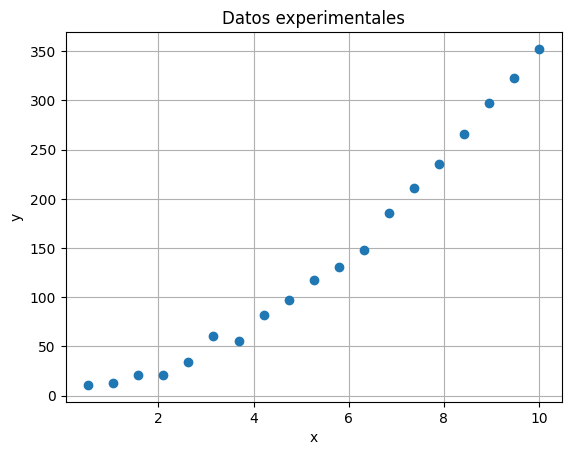

In [ ]:
plt.errorbar(x,y,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos experimentales')
plt.grid()

In [ ]:
def modelo(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n
  return y

def GetFit(x,y,n=2):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol
_x = np.linspace(np.min(x),np.max(x),100)
_y = modelo(_x,GetFit(x,y))
solucionX = GetFit(x,y)


f(x) = 3.9144 + 5.0423x + 3.0417x^2


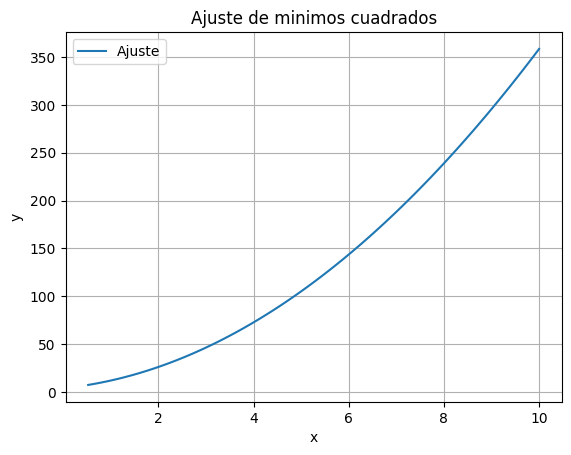

In [ ]:
plt.errorbar(x,y,fmt='o', label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(_x,_y, label='Ajuste')
plt.title('Ajuste de minimos cuadrados')
plt.legend()
print('f(x) = {} + {}x + {}x^2'.format(str(round(solucionX[0],4)),str(round(solucionX[1],4)),str(round(solucionX[2],4))))
plt.grid()

In [ ]:
import sympy as sym
X = sym.Symbol('x')
modelo(X,solucionX)

3.04171870549847*x**2 + 5.04229284016467*x + 3.91439387638529